In [1]:
%load_ext autoreload
%autoreload 2
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.molSize = (400, 400)
import numpy as np
import pandas as pd
from toolsets.search import string_search, quick_search_values, quick_search_sorted, search_feature
from tqdm import tqdm
import os
import ast
from molmass import Formula
from toolsets.file_io import get_file_list
from rdkit import Chem
import toolsets.T_rex as trx
import toolsets.raw_data_scaffold as rds
import toolsets.feature_std_matching as fsm
import toolsets.denoising_related_functions as drf
from toolsets.file_io import export_library_msp
from toolsets.std_list_prep import complete_adducts
import toolsets.spectra_operations as so
from toolsets.spectra_plotter import head_to_tail_plot, ms2_plot
import time
import toolsets.chem_helpers as ch
import toolsets.std_list_prep as slp
# master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/Alkaloids_lib'
# std_list = pd.read_csv(os.path.join(master_dir, 'alkaloids-libgen-input_CAS.csv'),encoding='unicode_escape')
from toolsets.file_io import get_file_list
from toolsets.feature_std_matching import feature_matching
master_parent = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/Alkaloids_lib'

# Sanitizing the std_list

In [132]:
std_list_pos = std_list.copy()
std_list_neg = std_list.copy()

In [104]:
std_list_pos =slp.complete_std_list(std_list_pos)

In [106]:
std_list_pos.to_csv(os.path.join(master_parent, 'std_list_pos.csv'), index = False)

In [133]:
std_list_neg =slp.complete_std_list(std_list_neg, adducts= ['[M]-', '[M-H]-', '[M+Cl]-', '[M-H2O-H]-'])

In [145]:
std_list_neg['Mix'] = std_list_neg['Mix'].str.replace('pos', 'neg')

In [184]:
std_list_neg.to_csv(os.path.join(master_parent, 'std_list_neg.csv'), index = False)

In [113]:
ms2

,scan_idx,cycle,ms_level,precursor_mz,polarity,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
0,89,88,2,140.956561,+,0.234167,"[[41.03798972955178, 19.0], [41.21618427917624...","(140.456561395611, 141.456561395611)",140.998564,0.229983,1778.0,1.000000,0.042003,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML
1,91,89,2,97.967541,+,0.238333,"[[41.039787744498454, 62.0], [42.0383036662876...","(97.467540596692, 98.467540596692)",97.968200,0.236800,5482.0,0.982790,0.000660,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML
2,92,89,2,105.934045,+,0.239000,"[[51.023284245484206, 26.0], [55.9315430823134...","(105.434045418577, 106.434045418577)",105.932538,0.236800,11797.0,0.995948,0.001508,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML
3,93,89,2,113.962728,+,0.239667,"[[41.041585798832884, 31.0], [42.0373937828759...","(113.462728274948, 114.462728274948)",113.962267,0.236800,4398.0,0.951948,0.000462,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML
4,94,89,2,159.967700,+,0.240333,"[[42.03375434769863, 62.0], [55.93259261493957...","(159.467699899362, 160.467699899362)",159.966208,0.236800,1850.0,0.939086,0.001492,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,4304,2097,2,146.934858,+,9.756183,"[[54.897363378305684, 26.0], [55.0555236527533...","(146.434858393755, 147.434858393755)",146.933536,9.753317,1716.0,0.953333,0.001322,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML
2207,4305,2097,2,182.981941,+,9.756850,"[[42.032865363852736, 243.0], [55.934719456054...","(182.48194100621, 183.48194100621)",182.981876,9.753317,2231.0,1.000000,0.000065,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML
2208,4306,2097,2,287.886857,+,9.757517,"[[70.07465498572084, 26.0], [71.93234129639809...","(287.386857150623, 288.386857150623)",287.887385,9.753317,3453.0,0.993097,0.000528,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML
2209,4310,2100,2,99.947315,+,9.770350,"[[40.02398219272896, 6.0], [40.49591065785021,...","(99.447315068413, 100.447315068413)",99.946273,9.766133,19569.0,0.970059,0.001042,Alkaloids-pos-mix34,Alkaloids-pos-mix34.mzML


In [116]:
ion_intensity = np.sum(intensity[:index_left])

# map ms2

In [48]:
master_child = ['QE_neg', 'QE_pos', 'TTOF_neg', 'TTOF_pos']
for c in master_child:
    mzml_dir = os.path.join(master_parent, c, 'mzml')
    pl_dir = os.path.join(master_parent, c, 'pl')
    file_list = get_file_list(mzml_dir, '.mzML')
    for f in tqdm(file_list):
        ms1, ms2 = rds.read_mzml(f, mzml_dir)
        ms1_features = pd.read_csv(os.path.join(pl_dir, f+'.csv'))
        if 'anchor_pmz' in ms1_features.columns:
            ms1_features = trx.deduplication(ms1_features)
        ms1_features = trx.map_ms2(ms1_features, ms2)[0]
        ms1_features.to_csv(os.path.join(pl_dir, f+'.csv'), index = False)




100%|██████████| 48/48 [01:50<00:00,  2.30s/it]


In [5]:
from toolsets.feature_std_matching import feature_matching

In [33]:
matched_all = pd.DataFrame()

In [159]:
child = 'QE_neg'
pl_dir = os.path.join(master_parent, child, 'pl')
std_list = pd.read_csv(os.path.join(master_parent, 'std_list_neg.csv'))
mzml_dir = os.path.join(master_parent, child, 'mzml')
matched_all = pd.DataFrame()
for mix in std_list['mix'].unique():
    std_list_mix = string_search(std_list, 'mix', mix)
    feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))
    matched_mix = feature_matching(feature_mix, std_list_mix,['[M]-',
                                                              '[M-H]-',
                                                              '[M+Cl]-',
                                                              '[M-H2O-H]-'])
    if len(matched_mix)>0:
        matched_all=pd.concat([matched_all, matched_mix], ignore_index=True)
import toolsets.denoising_related_functions as drf
msms_d = []
ei = []
for index, row in matched_all.iterrows():
    denoised = drf.spectra_denoising(row['msms'],row['reference_smiles'], row['reference_adduct'])
    msms_d.append(denoised[0])
    ei.append(denoised[1])
matched_all['msms_denoised']=msms_d
matched_all['ei']=ei
threshold = matched_all['ei'].mean()-1*matched_all['ei'].std()
matched_all = matched_all[matched_all['ei']>threshold]

In [142]:
matched_all.to_csv(os.path.join(master_parent, 'QE_neg.csv'), index = False)

In [147]:
export_library_msp(matched_all, os.path.join(master_parent, 'QE_neg.txt'))

100%|██████████| 132/132 [00:00<00:00, 2004.01it/s]


In [161]:
child = 'QE_pos'
pl_dir = os.path.join(master_parent, child, 'pl')
std_list = pd.read_csv(os.path.join(master_parent, 'std_list_pos.csv'))
mzml_dir = os.path.join(master_parent, child, 'mzml')
matched_all = pd.DataFrame()
for mix in std_list['mix'].unique():
    std_list_mix = string_search(std_list, 'mix', mix)
    feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))
    matched_mix = feature_matching(feature_mix, std_list_mix,['[M]+',
                                                              '[M+H]+',
                                                              '[M+Na]+',
                                                              '[M+NH4]+'])
    if len(matched_mix)>0:
        matched_all=pd.concat([matched_all, matched_mix], ignore_index=True)

In [164]:
import toolsets.denoising_related_functions as drf
msms_d = []
ei = []
for index, row in matched_all.iterrows():
    denoised = drf.spectra_denoising(row['msms'],row['reference_smiles'], row['reference_adduct'])
    msms_d.append(denoised[0])
    ei.append(denoised[1])
matched_all['msms_denoised']=msms_d
matched_all['ei']=ei
threshold = matched_all['ei'].mean()-1*matched_all['ei'].std()
matched_all = matched_all[matched_all['ei']>threshold]

In [167]:
matched_all.to_csv(os.path.join(master_parent, 'QE_pos.csv'), index = False)
export_library_msp(matched_all, os.path.join(master_parent, 'QE_pos.txt'))

100%|██████████| 674/674 [00:01<00:00, 570.40it/s] 


# Below TTOF POS

In [3]:
child = 'TTOF_pos'
pl_dir = os.path.join(master_parent, child, 'pl')
std_list = pd.read_csv(os.path.join(master_parent, 'std_list_pos.csv'))
mzml_dir = os.path.join(master_parent, child, 'mzml')
matched_all = pd.DataFrame()
for mix in std_list['mix'].unique():
    std_list_mix = string_search(std_list, 'mix', mix)
    feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))
    matched_mix = feature_matching(feature_mix, std_list_mix,['[M]+',
                                                              '[M+H]+',
                                                              '[M+Na]+',
                                                              '[M+NH4]+'])
    if len(matched_mix)>0:
        matched_all=pd.concat([matched_all, matched_mix], ignore_index=True)
# import toolsets.denoising_related_functions as drf
# msms_d = []
# ei = []
# for index, row in tqdm(matched_all.iterrows(), total = len(matched_all)):
#     denoised = drf.spectra_denoising(row['msms'],row['reference_smiles'], row['reference_adduct'])
#     msms_d.append(denoised[0])
#     ei.append(denoised[1])
# matched_all['msms_denoised']=msms_d
# matched_all['ei']=ei
# threshold = matched_all['ei'].mean()-1*matched_all['ei'].std()
# matched_all = matched_all[matched_all['ei']>threshold]

In [6]:
string_search(matched_all, 'reference_name', 'Guvacoline hydrochloride')

,precursor_mz,CAS,reference_adduct,reference_mz,comment,reference_smiles,reference_formula,reference_mix,reference_rt,reference_name,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr,pmz_offset,msms,ms2_scan_idx
0,142.086492,6197-39-3,[M+H]+,142.086255,Major,COC(=O)C1=CCCNC1,C7H11NO2,Alkaloids-pos-mix26,[0.351],Guvacoline hydrochloride,0.350743,0.318117,0.4328,327258.0,19.0,"[101, 106, 121]",0.012416,0.001673,41.02943177465313\t31.0\n42.01872727331691\t62...,179.0


In [6]:
len(matched_all['CAS'].unique())

417

In [8]:
from toolsets.helpers import check_missing_compound

In [9]:
missing = check_missing_compound(matched_all['CAS'], std_list['CAS'])

In [12]:
missing_df = std_list[std_list['CAS'].isin(missing)]

In [14]:
plot_dir = os.path.join(master_parent, 'eics')
if os.path.exists(plot_dir)==False:
    os.makedirs(plot_dir)

In [80]:
ms1, ms2 = rds.read_mzml(mix, mzml_dir)
mass_sorted, intensity_sorted, index_sorted, rt_list = trx.build_index(ms1)
feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))

In [87]:
tt = trx.detect_all_peaks(intensity_list)

In [90]:
feature_temp = trx.get_features(mass_sorted, intensity_sorted, index_sorted,rt_list,  intensity_threshold = 1000, n_neighbor = 1)

100%|██████████| 104362/104362 [00:11<00:00, 9107.80it/s] 


In [99]:
ttt = trx.find_feature(row['mix'], mzml_dir,intensity_threshold = 1000, n_neighbor = 1)

100%|██████████| 104362/104362 [00:11<00:00, 9083.96it/s] 


In [15]:
comment = []
mix = np.NAN
for index, row in tqdm(missing_df.iterrows(), total = len(missing_df)):
    # row = missing_df.iloc[1]
    current_comment = np.NAN
    if row['rt_reference']==row['rt_reference']:
        rt_all = ast.literal_eval(row['rt_reference'])
    else:
        current_comment = 'no rt reference given'
        comment.append(current_comment)
        continue
    pmz = row['[M+H]+']
    if pmz == 0:
        pmz = row['[M]+']
    if mix == mix and mix == row['mix']:
        pass
    else:
        mix = row['mix']
        ms1, ms2 = rds.read_mzml(mix, mzml_dir)
        mass_sorted, intensity_sorted, index_sorted, rt_list = trx.build_index(ms1)
        feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))

    feature_matched = pd.DataFrame()
    for r in rt_all:
        feature_matched_temp = search_feature(feature_mix, pmz = pmz, rt = r, rt_error=3)
        feature_matched = pd.concat([feature_matched, feature_matched_temp])
    # break
    if len(feature_matched)>0:
        if feature_matched['msms'].isna().all():
            current_comment = 'feature found, no ms2 assigned'
            comment.append(current_comment)
        else:
            current_comment = 'other reasons'
            comment.append(current_comment)
    else:
        current_comment = 'no feature found'
        comment.append(current_comment)
        intensity_list = trx.flash_eic(pmz, mass_sorted, intensity_sorted, index_sorted)
        rds.EIC(rt_list, intensity_list, savepath=os.path.join(plot_dir, row['name']+'.png'),vlines_location_2=rt_all, show=False)
    if current_comment != current_comment:
        print('no comment made')
        break

# missing_df['comments']=comment




100%|██████████| 51/51 [02:04<00:00,  2.45s/it]


In [108]:
library_curated = pd.read_csv(os.path.join(master_parent, 'QTTOF_pos.csv'))

In [112]:
from toolsets.helpers import check_missing_compound

In [113]:
diff_quality =check_missing_compound(library_curated['CAS'], matched_all['CAS'])

In [116]:
low_quality = std_list[std_list['CAS'].isin(diff_quality) ]

In [118]:
low_quality.to_csv(os.path.join(master_parent, 'low_quality_curated.csv'), index = False)

In [89]:
mix = row['mix']
std_list_mix = string_search(std_list, 'mix', mix)
feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))
matched_mix = feature_matching(feature_mix, std_list_mix,['[M]+',
                                                          '[M+H]+',
                                                          '[M+Na]+',
                                                          '[M+NH4]+'])

In [125]:
library_curated

,precursor_mz,CAS,reference_adduct,reference_mz,comment,reference_smiles,reference_formula,reference_mix,reference_rt,reference_name,...,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr,msms,ms2_scan_idx,pmz_offset,msms_denoised,ei
0,291.069435,58-63-9,[M+Na]+,291.069990,Major,O=c1[nH]cnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C...,C10H12N4O5,Alkaloids-pos-mix1,[0.547],Inosine,...,0.711283,18878.0,50.0,"[136, 143, 187]",0.004769,51.94003455648366\t26.0\n55.057948948792394\t2...,277.0,6.592364e-04,55.057948948792394\t26.0\n60.987497557657406\t...,0.889195
1,113.033490,66-22-8,[M+H]+,113.034554,Major,O=c1cc[nH]c(=O)[nH]1,C4H4N2O2,Alkaloids-pos-mix1,[0.356],Uracil,...,0.497367,38906.0,30.0,"[103, 107, 134]",0.003643,40.01855110611829\t937.0\n40.55385431874952\t2...,198.0,0.000000e+00,40.01855110611829\t937.0\n41.02886977358843\t6...,0.801460
2,244.092623,65-46-3,[M+H]+,244.092797,Major,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1,C9H13N3O5,Alkaloids-pos-mix1,[0.328],Cytidine,...,0.513533,209224.0,37.0,"[98, 103, 136]",0.000337,40.01855110611829\t382.0\n40.524369351163024\t...,152.0,1.767334e-04,40.01855110611829\t382.0\n41.04145484601922\t9...,0.976548
3,137.046177,68-94-0,[M+H]+,137.045787,Major,O=c1nc[nH]c2nc[nH]c12,C5H4N4O,Alkaloids-pos-mix1,"[0.36, 0.549, 0.454]",Hypoxanthine,...,0.399033,222341.0,10.0,"[103, 108, 114]",0.056759,40.019438839796244\t373.0\n40.92376998186888\t...,199.0,1.447695e-03,40.019438839796244\t373.0\n41.04145484601922\t...,0.910923
4,159.026448,68-94-0,[M+Na]+,159.027731,Major,O=c1nc[nH]c2nc[nH]c12,C5H4N4O,Alkaloids-pos-mix1,"[0.36, 0.549, 0.454]",Hypoxanthine,...,0.417717,22945.0,13.0,"[104, 108, 118]",0.100502,41.039656860374556\t31.0\n43.01823420370624\t3...,190.0,2.842171e-14,43.01823420370624\t31.0\n46.99576034984248\t24...,0.707647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,142.121188,135-97-7,[M+H]+,142.122641,Major,CN1[C@H]2CC[C@@H]1CC(O)C2,C8H15NO,Alkaloids-pos-mix47,[0.314],Pseudotropine,...,0.578917,973460.0,71.0,"[94, 100, 166]",0.000086,41.03775362857845\t3316.0\n42.03260956586657\t...,151.0,1.858050e-03,41.03775362857845\t3316.0\n42.03260956586657\t...,0.921236
561,176.069709,942-24-5,[M+H]+,176.070605,Major,COC(=O)c1c[nH]c2ccccc12,C10H9NO2,Alkaloids-pos-mix47,[3.324],Methyl indole-3-carboxylate,...,3.682433,403029.0,78.0,"[864, 872, 943]",0.000210,40.211348235469565\t26.0\n40.42788501585076\t2...,1346.0,7.981105e-04,41.03602277093515\t123.0\n42.03267831595645\t2...,0.975902
562,414.337014,126-17-0,[M+H]+,414.336656,Major,C[C@H]1[C@H]2[C@H](C[C@H]3[C@@H]4CC=C5C[C@@H](...,C27H43NO2,Alkaloids-pos-mix47,[3.806],Solasodine,...,4.438150,4913936.0,135.0,"[969, 977, 1105]",0.000049,40.44650379084834\t9.0\n40.72454699297614\t9.0...,1546.0,3.114387e-03,41.03769739834662\t1311.0\n41.23571512367593\t...,0.983799
563,352.116991,19716-60-0,[M+H]+,352.117949,Major,COc1cc2c(cc1OC)-c1cc3ccc4c(c3c(=O)n1CC2)OCO4,C20H17NO5,Alkaloids-pos-mix47,[3.862],8-Oxoepiberberine,...,4.134783,9863.0,55.0,"[980, 986, 1036]",0.011646,72.93426704503787\t26.0\n99.0227747458793\t26....,1590.0,1.020874e-03,99.0227747458793\t26.0\n101.06084524204307\t26...,0.873212


In [126]:
pmz_offset = abs(library_curated['precursor_mz']-library_curated['reference_mz'])

In [130]:
missing_df

,name,CAS,mix,smiles,formula,rt_reference,mono_mass,[M]+,[M+H]+,[M+Na]+,[M+NH4]+,comment
6,Xanthine,69-89-6,Alkaloids-pos-mix1,O=c1[nH]c(=O)c2[nH]cnc2[nH]1,C5H4N4O2,"[0.485, 0.363]",152.033425,0.000000,153.040702,175.022646,170.067251,other reasons
11,Coenzyme A,85-61-0,Alkaloids-pos-mix2,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...,C21H36N7O16P3S,NaN,767.115209,0.000000,768.122487,790.104431,785.149036,no rt reference given
22,Sanguinarine chloride,5578-73-4,Alkaloids-pos-mix3,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,C20H14NO4+,[2.85],332.091734,332.091734,0.000000,0.000000,0.000000,"feature found, no ms2 assigned"
44,Pilocarpine nitrate,148-72-1,Alkaloids-pos-mix5,CC[C@@H]1C(=O)OC[C@@H]1Cc1cncn1C,C11H16N2O2,[1.248],208.121178,0.000000,209.128454,231.110399,226.155003,"feature found, no ms2 assigned"
81,Indole-3-carbinol,700-06-1,Alkaloids-pos-mix9,OCc1c[nH]c2ccccc12,C9H9NO,[2.215],147.068414,0.000000,148.075690,170.057635,165.102239,no feature found
94,Tetrahydroberberine,522-97-4,Alkaloids-pos-mix10,COc1ccc2c(c1OC)CN1CCc3cc4c(cc3C1C2)OCO4,C20H21NO4,[2.803],339.147058,0.000000,340.154335,362.136279,357.180884,"feature found, no ms2 assigned"
106,Catharanthine sulfate,70674-90-7,Alkaloids-pos-mix11,CCC1=C[C@@H]2CN3CCc4c([nH]c5ccccc45)[C@@](C(=O...,C21H24N2O2,[2.926],336.183778,0.000000,337.191055,359.172999,354.217604,"feature found, no ms2 assigned"
111,Tabersonine,4429-63-4,Alkaloids-pos-mix12,CC[C@]12C=CCN3CC[C@]4(C(=C(C(=O)OC)C1)Nc1ccccc...,C21H24N2O2,[3.042],336.183778,0.000000,337.191055,359.172999,354.217604,"feature found, no ms2 assigned"
134,Berberrubine chloride,15401-69-1,Alkaloids-pos-mix14,COc1ccc2cc3[n+](cc2c1O)CCc1cc2c(cc1-3)OCO2,C19H16NO4+,[1.7],322.107384,322.107384,0.000000,0.000000,0.000000,no feature found
142,Solasonine,19121-58-5,Alkaloids-pos-mix15,C[C@@H]1O[C@@H](O[C@@H]2[C@@H](O[C@@H]3O[C@H](...,C45H73NO16,[2.953],883.492935,0.000000,884.500212,906.482156,901.526761,"feature found, no ms2 assigned"


In [132]:
row = missing_df.loc[134]
mix = row['mix']
ms1, ms2 = rds.read_mzml(mix, mzml_dir)
mass_sorted, intensity_sorted, index_sorted, rt_list = trx.build_index(ms1)
feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))
pmz = row['[M+H]+']
if pmz == 0:
    pmz = row['[M]+']
search_feature(feature_mix, pmz)

,precursor_mz,eic_center,eic_offset,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr,pmz_offset,msms,ms2_scan_idx
667,322.105561,322.105232,0.004247,9.506535,9.333267,9.704200,3618.0,70.0,"[2148, 2191, 2219]",0.041961,0.000330,45.03175603615964\t26.0\n46.0650472283238\t31....,4045.0
143,322.106183,322.105232,0.004247,3.147603,3.089317,4.884150,23087.0,328.0,"[718, 727, 1047]",0.162709,0.000951,55.05923601309141\t26.0\n57.91737238601614\t26...,1713.0
3,322.107196,322.105232,0.004247,2.774055,2.740850,3.076317,4047550.0,49.0,"[666, 671, 716]",0.000622,0.001964,NaN,NaN


In [137]:
search_feature(ms2, 322.107196, mass_error=0.01)

,scan_idx,cycle,ms_level,precursor_mz,polarity,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
950,1676,725,2,322.105720,+,3.136683,"[[46.697829542352075, 26.0], [55.0195837182996...","(321.605719653327, 322.605719653327)",322.104585,3.134817,18361.0,1.000000,0.001135,Alkaloids-pos-mix14,Alkaloids-pos-mix14.mzML
1855,4045,2189,2,322.105766,+,9.492250,"[[45.03175603615964, 26.0], [46.0650472283238,...","(321.605766228814, 322.605766228814)",322.106515,9.489050,2639.0,0.952364,0.000749,Alkaloids-pos-mix14,Alkaloids-pos-mix14.mzML
981,1713,731,2,322.107397,+,3.178183,"[[55.05923601309141, 26.0], [57.91737238601614...","(321.607397291367, 322.607397291367)",322.107626,3.174983,19906.0,0.995549,0.000229,Alkaloids-pos-mix14,Alkaloids-pos-mix14.mzML


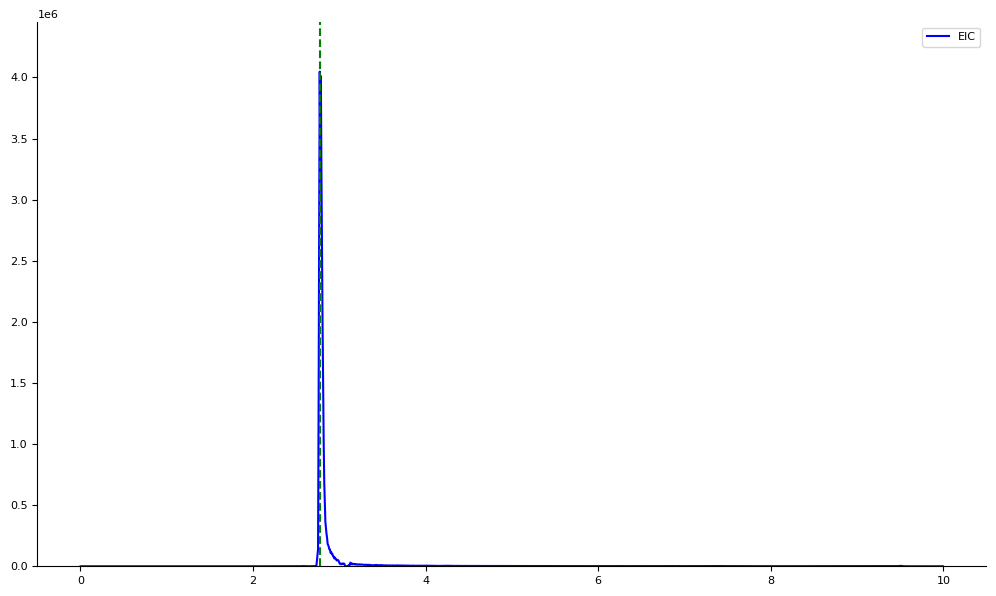

In [135]:
intensity_list = trx.flash_eic(322.107196, mass_sorted, intensity_sorted, index_sorted)
rds.EIC(rt_list, intensity_list, vlines_location_2=[2.774055])

In [216]:
std_list_mix = string_search(std_list, 'mix', mix)
feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))
matched_mix = feature_matching(feature_mix, std_list_mix,['[M]+',
                                                          '[M+H]+',
                                                          '[M+Na]+',
                                                          '[M+NH4]+'])

In [219]:
search_feature(feature_mix, 191.117889)

,precursor_mz,eic_center,eic_offset,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr,msms,ms2_scan_idx,pmz_offset
23,191.116879,191.116879,0.004,0.353560,0.329633,0.420150,341352.0,21.0,"[108, 113, 130]",0.021361,41.04175601655659\t46.0\n42.03571487862682\t25...,166.0,0.0
15,191.116879,191.116879,0.004,0.503464,0.420150,0.608967,609616.0,54.0,"[130, 156, 185]",0.010525,NaN,NaN,0.0


In [222]:
search_feature(ms2,191.117889 )

,scan_idx,cycle,ms_level,precursor_mz,polarity,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
32,144,111,2,191.116559,+,0.341183,"[[41.03816005286045, 93.0], [42.03298542778575...","(190.61655886975, 191.61655886975)",191.116879,0.337733,11806.0,1.0,0.000320,Alkaloids-pos-mix4,Alkaloids-pos-mix4.mzML
47,166,118,2,191.117318,+,0.374350,"[[41.04175601655659, 46.0], [42.03571487862682...","(190.617317533384, 191.617317533384)",191.116879,0.372267,108764.0,1.0,0.000438,Alkaloids-pos-mix4,Alkaloids-pos-mix4.mzML


In [196]:
matched_all.to_csv(os.path.join(master_parent, 'QTTOF.csv'), index = False)
export_library_msp(matched_all,os.path.join(master_parent, 'QTTOF.txt') )

100%|██████████| 565/565 [00:04<00:00, 140.67it/s]


In [ ]:
os.path.join(master_parent, 'QTTOF.csv')

In [197]:
child = 'TTOF_neg'
pl_dir = os.path.join(master_parent, child, 'pl')
std_list = pd.read_csv(os.path.join(master_parent, 'std_list_neg.csv'))
mzml_dir = os.path.join(master_parent, child, 'mzml')
matched_all = pd.DataFrame()
for mix in std_list['mix'].unique():
    std_list_mix = string_search(std_list, 'mix', mix)
    feature_mix = pd.read_csv(os.path.join(pl_dir, mix+'.csv'))
    matched_mix = feature_matching(feature_mix, std_list_mix,['[M]-',
                                                              '[M-H]-',
                                                              '[M+Cl]-',
                                                              '[M-H2O-H]-'])
    if len(matched_mix)>0:
        matched_all=pd.concat([matched_all, matched_mix], ignore_index=True)
import toolsets.denoising_related_functions as drf
msms_d = []
ei = []
for index, row in matched_all.iterrows():
    denoised = drf.spectra_denoising(row['msms'],row['reference_smiles'], row['reference_adduct'])
    msms_d.append(denoised[0])
    ei.append(denoised[1])
matched_all['msms_denoised']=msms_d
matched_all['ei']=ei
threshold = matched_all['ei'].mean()-1*matched_all['ei'].std()
matched_all = matched_all[matched_all['ei']>threshold]

In [224]:
qtof_neg = pd.read_csv(os.path.join(master_parent, 'QTTOF_neg.csv'))
qtof_pos = pd.read_csv(os.path.join(master_parent, 'QTTOF_pos.csv'))

In [225]:
all = pd.concat([qtof_neg, qtof_pos], ignore_index=True)

In [252]:
import ast

In [253]:
ast.literal_eval(row['reference_rt'])

[0.547]

In [260]:
qtof_pos = string_search(qtof_pos, 'comment', 'Major')

In [262]:
rt_offset = []
for index, row in qtof_pos.iterrows():
    rt_offset_row = []
    if row['reference_rt']==row['reference_rt']:
        for r in ast.literal_eval(row['reference_rt']):
            rt_offset_row.append(abs(row['rt_apex']-r))
        rt_offset.append(np.min(rt_offset_row))
    else:
        rt_offset.append(np.NAN)
qtof_pos['rt_offset']=rt_offset

In [273]:
np.nanquantile(rt_offset, 0.95)

0.022058584967657065

In [263]:
qtof_pos.iloc[np.nanargmax(rt_offset)]

precursor_mz                                                320.188501
CAS                                                            50-63-5
reference_adduct                                                [M+H]+
reference_mz                                                320.188802
comment                                                          Major
reference_smiles                     CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12
reference_formula                                           C18H26ClN3
reference_mix                                      Alkaloids-pos-mix48
reference_rt                                             [2.805, 2.98]
reference_name                                   Chloroquine phosphate
rt_apex                                                       9.500206
rt_start                                                      9.459517
rt_end                                                        9.698667
ms1_intensity                                                   2095.0
n_scna

In [265]:
ms1, ms2 = rds.read_mzml('Alkaloids-pos-mix48', mzml_dir)
mass_sorted, intensity_sorted, index_sorted, rt_list = trx.build_index(ms1)

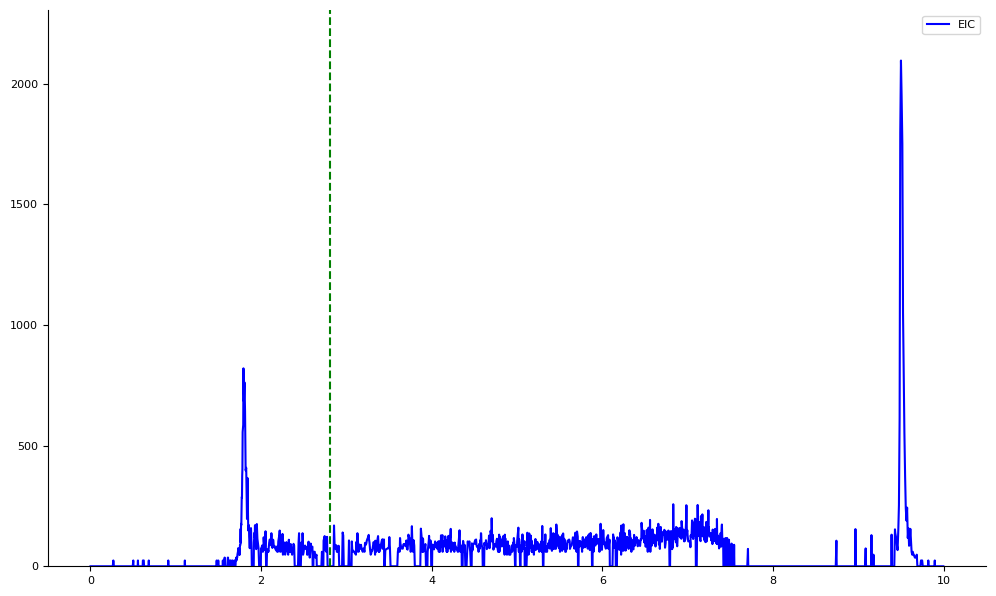

In [267]:
intensity_list = trx.flash_eic(320.188501, mass_sorted, intensity_sorted, index_sorted)
rds.EIC(rt_list, intensity_list, vlines_location_2=[2.805])

# some demo

In [276]:
std_list = pd.read_csv(os.path.join(master_parent, 'std_list_raw.csv'))

In [232]:
std_list

,Index,QR code,Plate,Row,Col,Volume（microliter）,Concentration（mM）,ID,MOLENAME,Synonyms,CAS,smiles,suggested_formula,Unnamed: 13
0,1,418721758,PHD156214,a,2,50.0,10.0,T0437,Inosine,INO 495;NSC 20262,58-63-9,OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1cnc2c1nc[nH]...,C10H12N4O5,Alkaloids-pos-mix1
1,2,418721766,PHD156214,a,3,50.0,10.0,T0069,Uracil,NaN,66-22-8,O=c1[nH]ccc(=O)[nH]1,C4H4N2O2,Alkaloids-pos-mix1
2,3,418721774,PHD156214,a,4,50.0,10.0,T1591L,Cytidine,Cytosine-1-β-D-ribofuranoside;Cytosine β-D-rib...,65-46-3,[C@@H]1(n2c(=O)nc(cc2)N)O[C@@H]([C@H]([C@H]1O)...,C9H13N3O5,Alkaloids-pos-mix1
3,4,418721782,PHD156214,a,5,50.0,10.0,T1362,Hypoxanthine,6-Hydroxypurine;Purin-6-ol;Sarcine;Sarkin,68-94-0,O=c1nc[nH]c2nc[nH]c12,C5H4N4O,Alkaloids-pos-mix1
4,5,418721790,PHD156214,a,6,50.0,10.0,T0925,Allantoin,Glyoxyldiureide;5-Ureidohydantoin,97-59-6,NC(=O)NC1NC(=O)NC1=O,C4H6N4O3,Alkaloids-pos-mix1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,464,419105557,PHD156219,g,5,50.0,10.0,T4036,Solasodine,Solancarpidine;Purapuridine;Solasodin,126-17-0,C[C@H]1[C@H]2[C@H](C[C@H]3[C@@H]4CC=C5C[C@@H](...,C27H43NO2,Alkaloids-pos-mix47
464,465,419105565,PHD156219,g,6,50.0,10.0,TN2023,8-Oxoepiberberine,Oxyepiberberine,19716-60-0,O=C1N2CCC3=CC(OC)=C(OC)C=C3C2=CC4=CC=C(OCO5)C5...,C20H17NO5,Alkaloids-pos-mix47
465,466,419105573,PHD156219,g,7,50.0,10.0,T8206,Cycleanine,NaN,518-94-5,[H][C@]12Cc3ccc(Oc4c(OC)c(OC)cc5CCN(C)[C@]([H]...,C38H42N2O6,Alkaloids-pos-mix47
466,467,419105581,PHD156219,g,8,50.0,10.0,T6535,Histamine Phosphate,Histamine diphosphate;Histamine acid phosphate,51-74-1,OP(O)(O)=O.OP(O)(O)=O.NCCC1=CNC=N1,C5H9N·2H3O4P,Alkaloids-pos-mix48


In [277]:
idx = []
for index, row in std_list.iterrows():
    mol = Chem.MolFromSmiles(row['smiles'])
    components = Chem.GetMolFrags(mol, asMols=True, sanitizeFrags=False)
    if len(components)==3:
        idx.append(index)

In [278]:
row = std_list.loc[idx[1]]


In [280]:
row['smiles']

'NCCN.Cn1c2c([nH]cn2)c(=O)n(C)c1=O.Cn1c2c([nH]cn2)c(=O)n(C)c1=O'

In [245]:
mol = Chem.MolFromSmiles(row['smiles'])
ch.everything_to_image(mol, os.path.join(master_parent, '3taimei.png'))

In [281]:
smiles_desalted = ch.desalter(row['smiles'])
mol = Chem.MolFromSmiles(smiles_desalted)
ch.everything_to_image(mol, os.path.join(master_parent, 'desalted.png'))

In [282]:
std_list

,Index,QR code,Plate,Row,Col,Volume（microliter）,Concentration（mM）,ID,MOLENAME,Synonyms,CAS,smiles,suggested_formula,Unnamed: 13
0,1,418721758,PHD156214,a,2,50.0,10.0,T0437,Inosine,INO 495;NSC 20262,58-63-9,OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1cnc2c1nc[nH]...,C10H12N4O5,Alkaloids-pos-mix1
1,2,418721766,PHD156214,a,3,50.0,10.0,T0069,Uracil,NaN,66-22-8,O=c1[nH]ccc(=O)[nH]1,C4H4N2O2,Alkaloids-pos-mix1
2,3,418721774,PHD156214,a,4,50.0,10.0,T1591L,Cytidine,Cytosine-1-β-D-ribofuranoside;Cytosine β-D-rib...,65-46-3,[C@@H]1(n2c(=O)nc(cc2)N)O[C@@H]([C@H]([C@H]1O)...,C9H13N3O5,Alkaloids-pos-mix1
3,4,418721782,PHD156214,a,5,50.0,10.0,T1362,Hypoxanthine,6-Hydroxypurine;Purin-6-ol;Sarcine;Sarkin,68-94-0,O=c1nc[nH]c2nc[nH]c12,C5H4N4O,Alkaloids-pos-mix1
4,5,418721790,PHD156214,a,6,50.0,10.0,T0925,Allantoin,Glyoxyldiureide;5-Ureidohydantoin,97-59-6,NC(=O)NC1NC(=O)NC1=O,C4H6N4O3,Alkaloids-pos-mix1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,464,419105557,PHD156219,g,5,50.0,10.0,T4036,Solasodine,Solancarpidine;Purapuridine;Solasodin,126-17-0,C[C@H]1[C@H]2[C@H](C[C@H]3[C@@H]4CC=C5C[C@@H](...,C27H43NO2,Alkaloids-pos-mix47
464,465,419105565,PHD156219,g,6,50.0,10.0,TN2023,8-Oxoepiberberine,Oxyepiberberine,19716-60-0,O=C1N2CCC3=CC(OC)=C(OC)C=C3C2=CC4=CC=C(OCO5)C5...,C20H17NO5,Alkaloids-pos-mix47
465,466,419105573,PHD156219,g,7,50.0,10.0,T8206,Cycleanine,NaN,518-94-5,[H][C@]12Cc3ccc(Oc4c(OC)c(OC)cc5CCN(C)[C@]([H]...,C38H42N2O6,Alkaloids-pos-mix47
466,467,419105581,PHD156219,g,8,50.0,10.0,T6535,Histamine Phosphate,Histamine diphosphate;Histamine acid phosphate,51-74-1,OP(O)(O)=O.OP(O)(O)=O.NCCC1=CNC=N1,C5H9N·2H3O4P,Alkaloids-pos-mix48


In [284]:
row = string_search(std_list, 'MOLENAME', 'Betaine chloride').iloc[0]
mol = Chem.MolFromSmiles(row['smiles'])
ch.everything_to_image(mol, os.path.join(master_parent, 'carboxylic_demo.png'))

In [285]:
smiles_desalted = ch.desalter(row['smiles'])
mol = Chem.MolFromSmiles(smiles_desalted)
ch.everything_to_image(mol, os.path.join(master_parent, 'carboxylic_demo_desalted.png'))

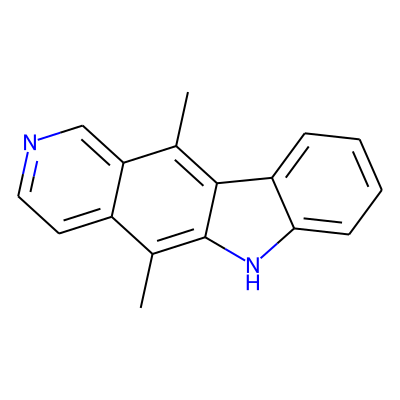

In [288]:
row = std_list.iloc[108]
mol = Chem.MolFromSmiles(row['smiles'])
mol
# ch.everything_to_image(mol, os.path.join(master_parent, 'carboxylic_demo.png'))